Vamos analisar cafe em grao sem torra com codigo CNM 0901.11.10 de acordo com https://portalunico.siscomex.gov.br/classif/#/nomenclatura/0901/expandida?h=cafe&palavraInteira=false

Para ETL vamos primeiro buscar os dados somente para isso na balança de importação e exportação


Como é .gov pedia autenticação, nesse caso baixei o .zip para ETL. 

In [ ]:
import pandas as pd

# Set the chunk size
chunk_size = 1000000  # Adjust this based on your memory capacity

# Read the first chunk to inspect the columns
chunk = pd.read_csv('IMP_COMPLETA.csv', chunksize=chunk_size)

# Get the columns of the first chunk
first_chunk = next(chunk)  # Get the first chunk
print(first_chunk.columns)  # Print the column names

In [ ]:
import pandas as pd

# Caminho para o arquivo CSV
csv_file_path = 'IMP_COMPLETA.csv'

# CO_NCM específico que você deseja filtrar
co_ncm_especifico = "9011110"

# Nome do arquivo de saída
output_file = f"filtered_{csv_file_path.split('/')[-1]}"

# Tamanho do chunk
chunk_size = 1000000  # Ajuste conforme necessário

# Criar o arquivo de saída
with open(output_file, mode='w', newline='', encoding='utf-8') as output_csv:
    writer = None  # Variável para controlar a escrita do cabeçalho
    # Ler o CSV em chunks
    for chunk in pd.read_csv(csv_file_path, chunksize=chunk_size, delimiter=';', encoding='latin-1'):
        # Filtrar o chunk pelo valor de CO_NCM
        filtered_chunk = chunk[chunk['CO_NCM'].astype(str) == co_ncm_especifico]
        
        # Se o arquivo de saída estiver vazio, escrever o cabeçalho
        if writer is None:
            filtered_chunk.to_csv(output_csv, header=True, index=False, sep=';')
            writer = True  # Garantir que a próxima vez não escreva o cabeçalho
        else:
            # Caso contrário, escrever apenas as linhas filtradas
            filtered_chunk.to_csv(output_csv, header=False, index=False, sep=';')

print(f"Processamento concluído. Registros filtrados salvos em: {output_file}")


In [ ]:
import pandas as pd

# Caminho para o arquivo CSV
csv_file_path = 'EXP_COMPLETA.csv'

# CO_NCM específico que você deseja filtrar
co_ncm_especifico = "9011110"

# Nome do arquivo de saída
output_file = f"filtered_{csv_file_path.split('/')[-1]}"

# Tamanho do chunk
chunk_size = 1000000  # Ajuste conforme necessário

# Criar o arquivo de saída
with open(output_file, mode='w', newline='', encoding='utf-8') as output_csv:
    writer = None  # Variável para controlar a escrita do cabeçalho
    # Ler o CSV em chunks
    for chunk in pd.read_csv(csv_file_path, chunksize=chunk_size, delimiter=';', encoding='latin-1'):
        # Filtrar o chunk pelo valor de CO_NCM
        filtered_chunk = chunk[chunk['CO_NCM'].astype(str) == co_ncm_especifico]
        
        # Se o arquivo de saída estiver vazio, escrever o cabeçalho
        if writer is None:
            filtered_chunk.to_csv(output_csv, header=True, index=False, sep=';')
            writer = True  # Garantir que a próxima vez não escreva o cabeçalho
        else:
            # Caso contrário, escrever apenas as linhas filtradas
            filtered_chunk.to_csv(output_csv, header=False, index=False, sep=';')

print(f"Processamento concluído. Registros filtrados salvos em: {output_file}")

In [4]:
# Caminho para os arquivos CSV
imp_file_path = 'filtered_IMP_COMPLETA.csv'
exp_file_path = 'filtered_EXP_COMPLETA.csv'

# Ler os dois arquivos CSV
imp_df = pd.read_csv(imp_file_path, delimiter=';', encoding='latin-1')
exp_df = pd.read_csv(exp_file_path, delimiter=';', encoding='latin-1')

# Para o DataFrame de importação
imp_df = imp_df.groupby(['CO_ANO', 'CO_MES'], as_index=False).agg({
    'VL_FOB': 'sum',
    'KG_LIQUIDO': 'sum',
    'QT_ESTAT': 'sum'
})

# Para o DataFrame de exportação
exp_df = exp_df.groupby(['CO_ANO', 'CO_MES'], as_index=False).agg({
    'VL_FOB': 'sum',
    'KG_LIQUIDO': 'sum',
    'QT_ESTAT': 'sum'
})



# Adicionar a coluna 'Label' para identificar se é Import ou Export
imp_df['Label'] = 'Import'
exp_df['Label'] = 'Export'

## Ler a planilha com participação
file = 'EXP_MENSAL_071A.xlsx'
df = pd.read_excel(file, skiprows=5)
df = df.iloc[:-1]
df[['CO_MES', 'CO_ANO']] =   df['Data'].str.split('/',expand= True)
df['CO_MES'] = df['CO_MES'].astype(int)
df['CO_ANO'] = df['CO_ANO'].astype(int)
df = df.rename(columns={'Part. (%) do Produto em Valor no Total Brasil': 'part'})
# Fazer o merge com df2, mas apenas nas linhas filtradas
exp_df = exp_df.merge(df[['CO_ANO', 'CO_MES', 'part']], on=['CO_ANO', 'CO_MES'], how='left')

# Concatenar os dois dataframes
merged_df = pd.concat([imp_df, exp_df], ignore_index=True)

# Exibir as primeiras linhas do dataframe concatenado
print(merged_df.head(-3))

# Salvar o dataframe concatenado em um novo arquivo CSV, se necessário
merged_df.to_csv('merged_data_with_labels.csv', index=False, sep=';', encoding='utf-8')


# Concatenar os dois dataframes
merged_df = pd.concat([imp_df, exp_df], ignore_index=True)

     CO_ANO  CO_MES      VL_FOB  KG_LIQUIDO  QT_ESTAT   Label      part
0      1997       2       89040       50400        50  Import       NaN
1      1997       3      374392      200859     30171  Import       NaN
2      2000       3      107813       75000        75  Import       NaN
3      2000       9        2480       17360       248  Import       NaN
4      2002      12         515         258         0  Import       NaN
..      ...     ...         ...         ...       ...     ...       ...
380    2024       6   801843949   203252346    691878  Export  2.791184
381    2024       7   832076871   202266405    575464  Export  2.697934
382    2024       8   870350027   206556395    356225  Export  3.037112
383    2024       9  1070565126   242988073    444999  Export  3.762101
384    2024      10  1307749175   279213668    496192  Export  4.463535

[385 rows x 7 columns]


PARA AMANHA, ENTENDER MELHOR ESSES DADOS, PENSAR EM COMO AVALIAR< ACHOQUE KG LIQUIDO E DANDO MERGE POR MES/ANO. 

CONFERIR AS TAABELAS QUE TINHA VISTO E FAZER ANALISE DE DADOS/ML


https://balanca.economia.gov.br/balanca/publicacoes_dados_consolidados/pg.html AQUI TEM TOTAL POR E PARTICIPAÇÂO NO TOTAL DO BRASIL ( AQUI É TUDO DE CAFE JUNTO) somente exportação


In [5]:
merged_df.describe()

,CO_ANO,CO_MES,VL_FOB,KG_LIQUIDO,QT_ESTAT,part
count,388.000000,388.000000,3.880000e+02,3.880000e+02,3.880000e+02,337.000000
mean,2011.371134,6.487113,3.189227e+08,1.222216e+08,4.322202e+06,2.644043
std,8.223392,3.433734,2.389501e+08,6.296728e+07,5.394185e+07,1.029844
min,1997.000000,1.000000,3.500000e+01,1.000000e+00,0.000000e+00,0.863415
25%,2004.000000,3.000000,1.378842e+08,9.554410e+07,9.586600e+04,1.938064
50%,2012.000000,6.000000,2.960002e+08,1.292809e+08,1.347340e+05,2.384159
75%,2018.000000,9.000000,4.410956e+08,1.639834e+08,2.376615e+05,2.963743
max,2025.000000,12.000000,1.372119e+09,2.852499e+08,1.044186e+09,6.874484


AQUI FALTOU O DESCRIBE ANTES. Ok excluir CO_NCM, e PARA DESCRIBE TIAR ANO MES DESCOBRIR O QUE E UNID

UNIDADE ESTATISTICA É A MEDIDA ADOTADA PARA CADA TIPO DE PRODUTO, pode ser encontrada em 
http://www.mdic.gov.br/balanca/bd/tabelas/TABELAS_AUXILIARES.xlsx
https://www.gov.br/mdic/pt-br/assuntos/comercio-exterior/estatisticas/base-de-dados-bruta#Tabelas_Correlacoes

acho q era 21, se for é TONELADA METRICA LIQUIDA

C:\Users\Administrador\AppData\Local\Temp\ipykernel_15492\1616138258.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_export['Toneladas'] = df_export['KG_LIQUIDO'] / 1000


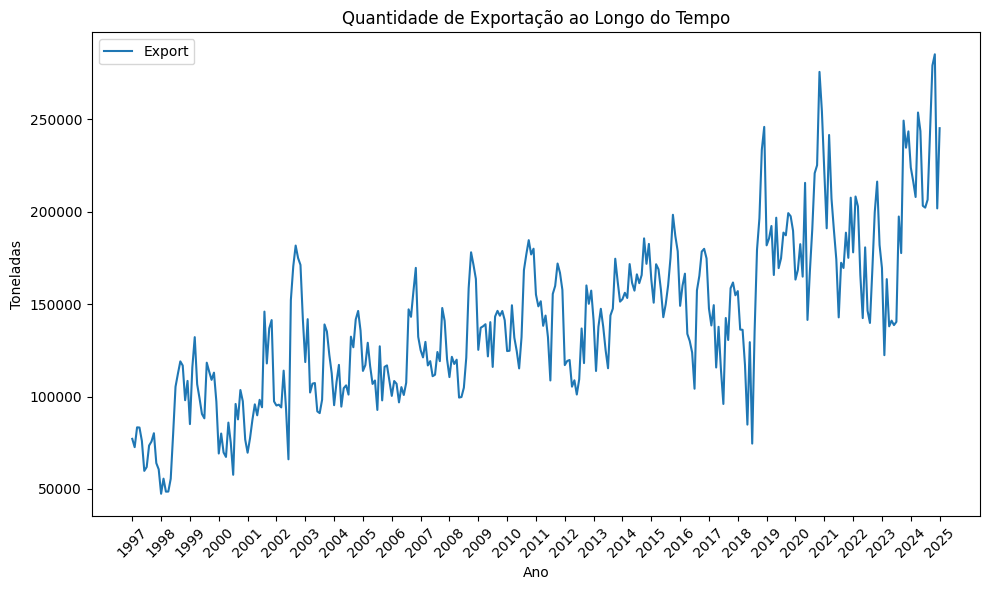

In [12]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.metrics import r2_score

# Filtrar os dados para Label = 'Export'
df_export = merged_df[merged_df['Label'] == 'Export']

# Gráfico para o valor FOB com ticks por ano
plt.figure(figsize=(10,6))

df_export['Toneladas'] = df_export['KG_LIQUIDO'] / 1000

# Plotando os dados de 'Export'
plt.plot(df_export['CO_MES'].astype(str) + '/' + df_export['CO_ANO'].astype(str), df_export['Toneladas'], label='Export')

# Definir título e rótulos
plt.title('Quantidade de Exportação ao Longo do Tempo')
plt.xlabel('Ano')
plt.ylabel('Toneladas')

# Definir os ticks no eixo x para mostrar apenas os anos
# Usaremos a função `plt.xticks` para definir os ticks e garantir que apenas os anos sejam mostrados
years = df_export['CO_ANO'].unique()
year_labels = [str(year) for year in years]

# Alterar os ticks no eixo x para exibir apenas os anos
plt.xticks(ticks=range(0, len(df_export), 12), labels=year_labels, rotation=45)  # Ajuste para cada 12 meses

plt.legend()
plt.tight_layout()
plt.show()


Podemos ver um fenomeno sazonal com uma tendencia, ou uma serie historica não estatica. 

In [13]:

# # Criar a variável para o eixo x (meses e anos como números)
# # Aqui estamos apenas criando um número para cada mês, para ajustar a linha de tendência
# x_values = np.arange(len(df_export))

# # Ajuste de uma regressão polinomial de grau 2
# degree = 2
# coefficients = np.polyfit(x_values, df_export['Toneladas'], degree)

# # Calcular a linha de tendência polinomial
# trend_line_poly = np.polyval(coefficients, x_values)

# # Calcular o valor de R^2 para o modelo polinomial
# r_squared_poly = r2_score(df_export['Toneladas'], trend_line_poly)

# # Estender a linha de tendência para além dos dados
# x_extended = np.arange(len(df_export) + 12)  # Estendendo para mais 12 meses, por exemplo
# trend_line_extended = slope * x_extended + intercept

# # Gráfico para o peso em toneladas com ticks por ano
# plt.figure(figsize=(10,6))

# # Plotando os dados de 'Export' em toneladas
# plt.plot(df_export['CO_MES'].astype(str) + '/' + df_export['CO_ANO'].astype(str), df_export['Toneladas'], label='Export', color='blue')

# # Adicionando a linha de tendência
# plt.plot(df_export['CO_MES'].astype(str) + '/' + df_export['CO_ANO'].astype(str), trend_line_poly, label='Linha de Tendência', color='red', linestyle='--')

# # Definir título e rótulos

# plt.title(f'Peso (em Toneladas) de Exportação ao Longo do Tempo com Linha de Tendência\n$R^2$ = {r_squared:.4f}')

# plt.xlabel('Ano')
# plt.ylabel('Peso (Toneladas)')

# # Definir os ticks no eixo x para mostrar apenas os anos
# years = df_export['CO_ANO'].unique()
# year_labels = [str(year) for year in years]

# # Alterar os ticks no eixo x para exibir apenas os anos
# plt.xticks(ticks=range(0, len(df_export), 12), labels=year_labels, rotation=45)


# plt.legend()
# plt.tight_layout()
# plt.show()


Para modelos com sazonalidade e não estatica, podemos fazer a diferenciação e testa se isso torna os dados estaticos.

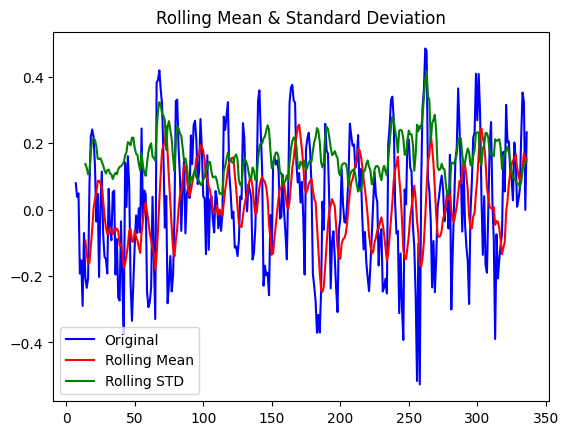

ADF Statistic: -4.60249315204813
p value: 0.00012780976633132644
Critical Values:
	1%: -3.4512146067362317
	5%: -2.870730188960711
	10%: -2.5716664849383113


In [46]:
# Forcesting libs
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from pandas.plotting import register_matplotlib_converters


# function to stabilize data
def get_stationarity(timeseries):
    
    # rolling statistics
    rolling_mean = timeseries.rolling(window=8).mean()
    rolling_std = timeseries.rolling(window=8).std()
    
    # rolling statistics plot
    original = plt.plot(timeseries, color='blue', label='Original')
    mean = plt.plot(rolling_mean, color='red', label='Rolling Mean')
    std = plt.plot(rolling_std, color='green', label='Rolling STD')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    # Dickey–Fuller test:
    result = adfuller(timeseries)
    print('ADF Statistic: {}'.format(result[0]))
    print('p value: {}'.format(result[1]))
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t{}: {}'.format(key, value))


df = exp_df[['CO_ANO', 'CO_MES', 'VL_FOB']].copy()
# Convertendo a série de VL_FOB para logaritmo (para estabilizar a variância)
df['log_VL_FOB'] = np.log(df['VL_FOB'])

# Subtraindo a média rolante
rolling_mean = df['log_VL_FOB'].rolling(window=8).mean()

# Subtraindo a média rolante da série log transformada
df_log_minus_mean = df['log_VL_FOB'] - rolling_mean

# Remover os valores nulos gerados pela média rolante
df_log_minus_mean.dropna(inplace=True)

# Remover os valores nulos gerados pela média rolante
df_log_minus_mean.dropna(inplace=True)

# Verificando a estacionaridade da série ajustada
get_stationarity(df_log_minus_mean)

Como aqui p value é muito pequeno e ADF < Critical para mesmo 1%, temos que a serie se torna estacionaria. Aqui podemos aplicar modelos tipo ARIMA.




Aqui vamos escolher um modelo ARIMA, ja que esse faz integradamente essa diferenciação acima. 

Vamos trabalhar com o modelo p (AR): Pelo grafico temos o uso de 3 lags
q (MA): Pelo grafico vamos usar 14


<Figure size 1200x500 with 0 Axes>

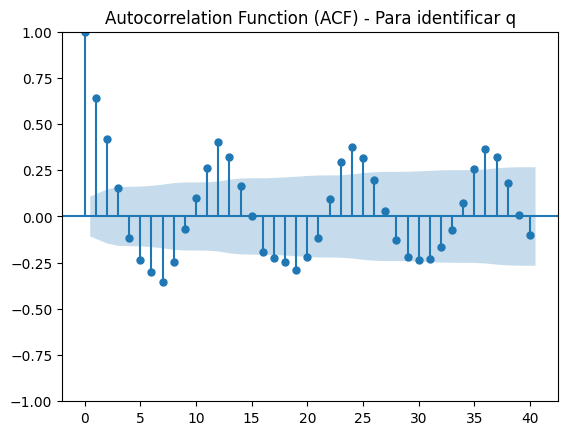

<Figure size 1200x500 with 0 Axes>

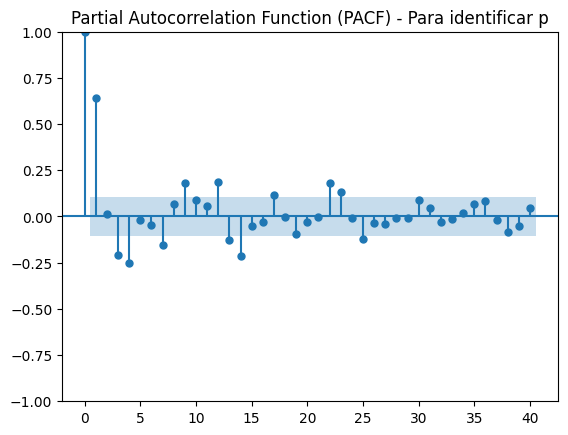

In [32]:

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
# Plot ACF (para identificar q)
plt.figure(figsize=(12,5))
plot_acf(df_log_minus_mean.dropna(), lags=40)
plt.title('Autocorrelation Function (ACF) - Para identificar q')
plt.show()

# Plot PACF (para identificar p)
plt.figure(figsize=(12,5))
plot_pacf(df_log_minus_mean.dropna(), lags=40, method='ywm')  # 'ywm' é mais robusto
plt.title('Partial Autocorrelation Function (PACF) - Para identificar p')
plt.show()

In [ ]:
# Gráfico para a participação do produto ao longo do tempo
plt.figure(figsize=(10,6))
for label in merged_df['Label'].unique():
    df_label = merged_df[merged_df['Label'] == label]
    plt.plot(df_label['CO_MES'].astype(str) + '/' + df_label['CO_ANO'].astype(str), df_label['part'], label=label)

plt.title('Participação ao Longo do Tempo')
plt.xlabel('Ano/Mês')
plt.ylabel('Participação (%)')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
# Gráfico de dispersão entre VL_FOB e KG_LIQUIDO
plt.figure(figsize=(10,6))
for label in merged_df['Label'].unique():
    df_label = merged_df[merged_df['Label'] == label]
    plt.scatter(df_label['KG_LIQUIDO'], df_label['VL_FOB'], label=label)

plt.title('Dispersão entre VL_FOB e KG_LIQUIDO')
plt.xlabel('KG Líquido')
plt.ylabel('Valor FOB')
plt.legend()
plt.tight_layout()
plt.show()


Aqui vamos escolher um modelo ARIMA (TEM NO GPT COMO ESCOLHER MELHOR OS PARAMETROS POR ACF E PACF, AGORA VOU TEESTAR COM 212 QUE E O CODIGO PRONTO)

c:\Users\Administrador\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Administrador\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Administrador\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Administrador\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters foun

                               SARIMAX Results                                
Dep. Variable:             log_VL_FOB   No. Observations:                  337
Model:                 ARIMA(3, 1, 4)   Log Likelihood                 147.108
Date:                Thu, 20 Feb 2025   AIC                           -278.216
Time:                        10:42:42   BIC                           -247.679
Sample:                    01-01-1997   HQIC                          -266.043
                         - 01-01-2025                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0461      0.192     -0.241      0.810      -0.421       0.329
ar.L2         -0.3316      0.131     -2.527      0.012      -0.589      -0.074
ar.L3          0.3708      0.150      2.467      0.0

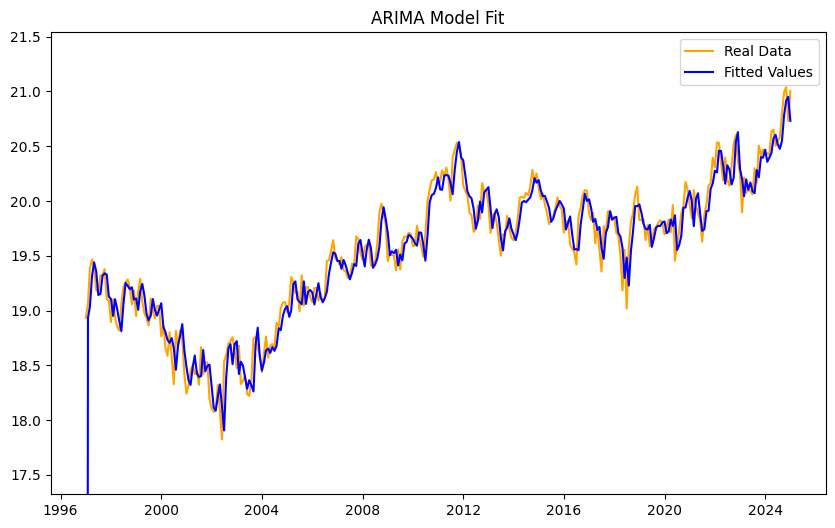

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA  # Corrigido aqui
from statsmodels.tsa.seasonal import seasonal_decompose

# Vamos corrigir isso:
df['Date'] = pd.to_datetime(df[['CO_ANO', 'CO_MES']].astype(str).agg('-'.join, axis=1) + '-01')

# Definir 'Date' como o índice temporal
df.set_index('Date', inplace=True)
# Transformação logarítmica
df['log_VL_FOB'] = np.log(df['VL_FOB'])

# Remover valores NaN gerados pela diferenciação
df.dropna(inplace=True)

# Decomposição sazonal (opcional)
decomposition = seasonal_decompose(df['log_VL_FOB'], period=12)  # period=12 para dados mensais

# Ajustando o modelo ARIMA (p, d, q)
model = ARIMA(df['log_VL_FOB'], order=(3, 1, 4))  # Exemplos de parâmetros: (p=2, d=1, q=2)
results = model.fit()

# Exibir o resumo do modelo
print(results.summary())

# Plotando o gráfico: Dados reais e valores ajustados pelo modelo
plt.figure(figsize=(10, 6))
plt.plot(df['log_VL_FOB'], label='Real Data', color='orange')
plt.plot(results.fittedvalues, label='Fitted Values', color='blue')
# Ajustando limites de acordo com os dados
plt.ylim(df['log_VL_FOB'].min() - 0.5, df['log_VL_FOB'].max() + 0.5)
plt.title('ARIMA Model Fit')
plt.legend()
plt.show()

PREDITIVO:

c:\Users\Administrador\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Administrador\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Administrador\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


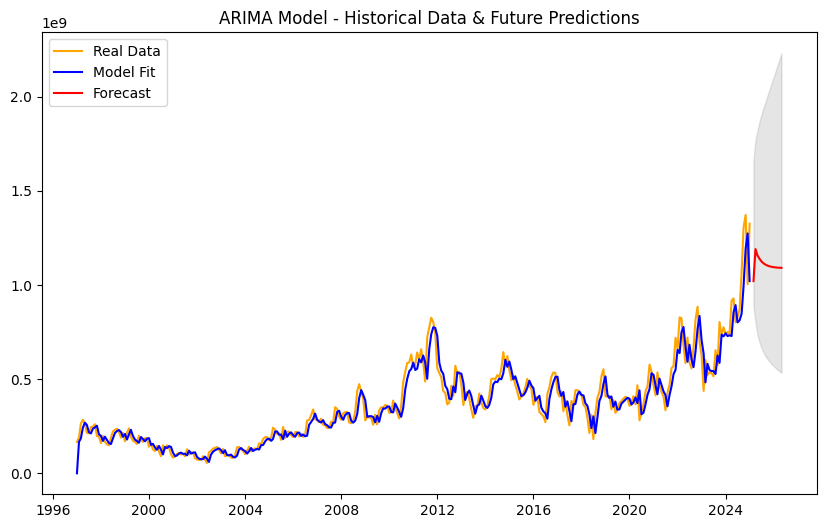

In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Ajuste do modelo ARIMA
model = ARIMA(df['log_VL_FOB'], order=(2, 1, 2))
results = model.fit()

# Número de previsões futuras
n_forecast = 15

# Gerando as previsões futuras
forecast = results.get_forecast(steps=n_forecast)
forecast_index = pd.date_range(df.index[-1], periods=n_forecast + 1, freq='ME')[1:]

# Pegando o último valor ajustado (fitted)
last_fitted_value = results.fittedvalues.iloc[-1]

# Valores previstos e intervalo de confiança (voltando à escala original)
forecast_values = np.exp(forecast.predicted_mean)
conf_int = forecast.conf_int()
conf_int_values = np.exp(conf_int)

# 🔹 **Corrigindo a descontinuidade**
forecast_values.iloc[0] = np.exp(last_fitted_value)  # Suaviza a transição

# 🔹 **Corrigindo o Model Fit para não começar em 0**
start_index = results.fittedvalues.first_valid_index()  # Obtém a primeira data válida
start_loc = df.index.get_loc(start_index)  # Converte para índice numérico
model_fit_values = np.exp(results.fittedvalues.iloc[start_loc:])  # Remove valores iniciais inconsistentes

# 🔹 **Plotando os dados**
plt.figure(figsize=(10, 6))

# Dados reais
plt.plot(df.index, np.exp(df['log_VL_FOB']), label='Real Data', color='orange')

# Ajuste do modelo (corrigido)
plt.plot(df.index[start_loc:], model_fit_values, label='Model Fit', color='blue')

# Previsões futuras ajustadas
plt.plot(forecast_index, forecast_values, label='Forecast', color='red')

# Intervalo de confiança
plt.fill_between(forecast_index, conf_int_values.iloc[:, 0], conf_int_values.iloc[:, 1], color='gray', alpha=0.2)

# Ajustando legenda e título
plt.title('ARIMA Model - Historical Data & Future Predictions')
plt.legend()
plt.show()


O Modelo preditivo capta bem que historicamente há uma tendencia de crescimento no valor total de venda, uma segunda análise incorporando a flutuação do dolar também poderia ser considerada para refletir apenas os valores de produção. Outra analise de valor poderia ser usando FOB/QT para entender o valor do café ao longo do tempo, inclusive comparando com a cotação e entender se há uma valorização do produto e dentre os tipos de café qual valorizou mais.




 Nesse sentido vamos perfomar a mesma análise na Quantidade estatistica presente na nossa coleta de dados. Esse valor vai refletir a produção nacional.

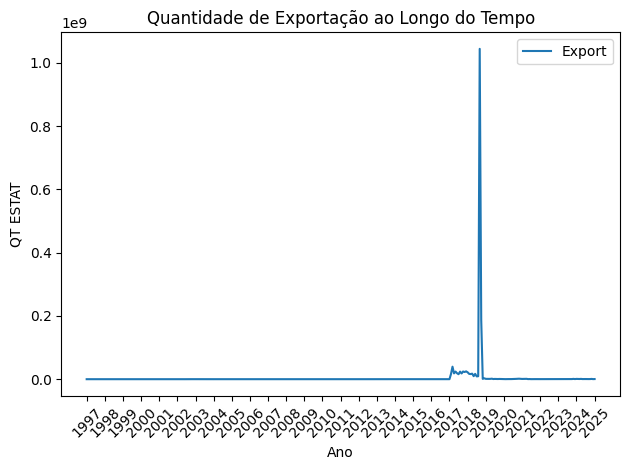

In [37]:
# Plotando os dados de 'Export'
plt.plot(df_export['CO_MES'].astype(str) + '/' + df_export['CO_ANO'].astype(str), df_export['QT_ESTAT'], label='Export')

# Definir título e rótulos
plt.title('Quantidade de Exportação ao Longo do Tempo')
plt.xlabel('Ano')
plt.ylabel('QT ESTAT')

# Definir os ticks no eixo x para mostrar apenas os anos
# Usaremos a função `plt.xticks` para definir os ticks e garantir que apenas os anos sejam mostrados
years = df_export['CO_ANO'].unique()
year_labels = [str(year) for year in years]

# Alterar os ticks no eixo x para exibir apenas os anos
plt.xticks(ticks=range(0, len(df_export), 12), labels=year_labels, rotation=45)  # Ajuste para cada 12 meses

plt.legend()
plt.tight_layout()
plt.show()

A alta foi impulsionada pela safra recorde de café em 2018.

Aqui há um claro outlier, com BoxCox o tratamento foi muito agressivo, vamos aplicar uma escala log + winsorização. (Cortar em percentil)


C:\Users\Administrador\AppData\Local\Temp\ipykernel_15492\1932676679.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_export['QT_ESTAT_winsor'] = winsorize(df_export['QT_ESTAT'], limits=[0.01, 0.01])
C:\Users\Administrador\AppData\Local\Temp\ipykernel_15492\1932676679.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_export['QT_ESTAT_winsor_log'] = np.log(df_export['QT_ESTAT_winsor'])


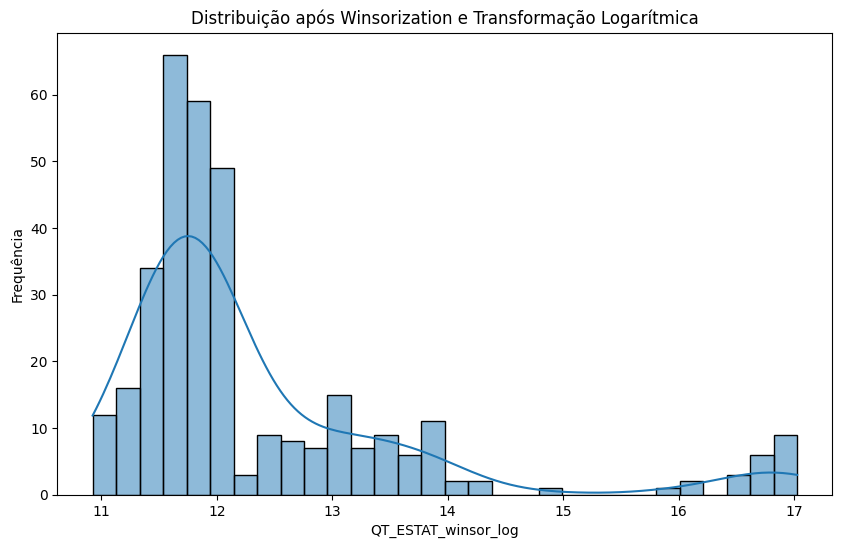

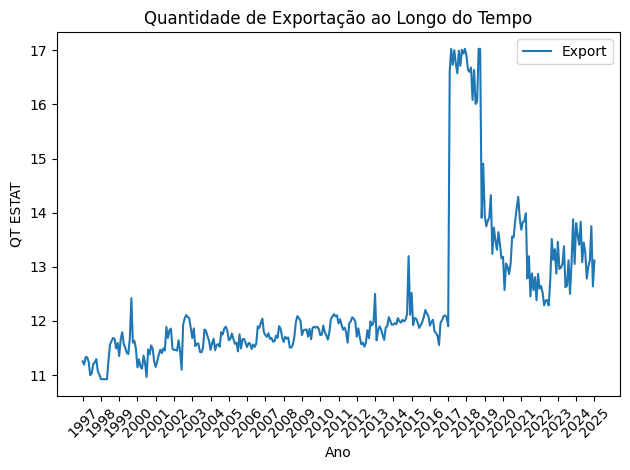

In [66]:
import seaborn as sns
from scipy.stats.mstats import winsorize

# Aplicando Winsorization (limitando aos percentis 1% e 99%)
df_export['QT_ESTAT_winsor'] = winsorize(df_export['QT_ESTAT'], limits=[0.01, 0.01])

# Aplicando transformação logarítmica
df_export['QT_ESTAT_winsor_log'] = np.log(df_export['QT_ESTAT_winsor'])

# Plotando a distribuição após Winsorization e transformação log
plt.figure(figsize=(10, 6))
sns.histplot(df_export['QT_ESTAT_winsor_log'], kde=True, bins=30)
plt.title('Distribuição após Winsorization e Transformação Logarítmica')
plt.xlabel('QT_ESTAT_winsor_log')
plt.ylabel('Frequência')
plt.show()


# Plotando os dados de 'Export'
plt.plot(df_export['CO_MES'].astype(str) + '/' + df_export['CO_ANO'].astype(str), df_export['QT_ESTAT_winsor_log'], label='Export')

# Definir título e rótulos
plt.title('Quantidade de Exportação ao Longo do Tempo')
plt.xlabel('Ano')
plt.ylabel('QT ESTAT')

# Definir os ticks no eixo x para mostrar apenas os anos
# Usaremos a função `plt.xticks` para definir os ticks e garantir que apenas os anos sejam mostrados
years = df_export['CO_ANO'].unique()
year_labels = [str(year) for year in years]

# Alterar os ticks no eixo x para exibir apenas os anos
plt.xticks(ticks=range(0, len(df_export), 12), labels=year_labels, rotation=45)  # Ajuste para cada 12 meses

plt.legend()
plt.tight_layout()
plt.show()

Novamente temos uma serie historica não estacionaria. então vamos testar diferenciação

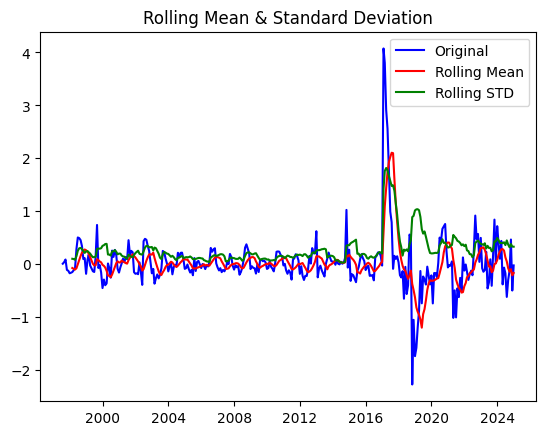

ADF Statistic: -6.619510427745087
p value: 6.087034225553507e-09
Critical Values:
	1%: -3.4505694423906546
	5%: -2.8704469462727795
	10%: -2.5715154495841017


In [67]:

# Subtraindo a média rolante
rolling_mean = df_export['QT_ESTAT_winsor_log'].rolling(window=8).mean()

# Subtraindo a média rolante da série log transformada
df_boxcox_minus_mean = df_export['QT_ESTAT_winsor_log'] - rolling_mean

# Remover os valores nulos gerados pela média rolante
df_boxcox_minus_mean.dropna(inplace=True)

# Verificando a estacionaridade da série ajustada
get_stationarity(df_boxcox_minus_mean)

Novamente p value pequeno e adf muito pequeno, então podemos usar ARIMA

<Figure size 1200x500 with 0 Axes>

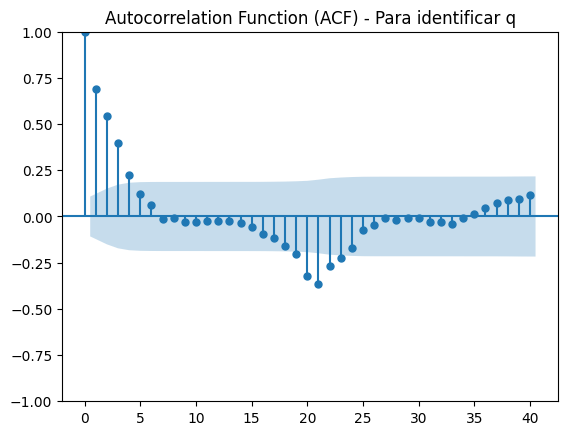

<Figure size 1200x500 with 0 Axes>

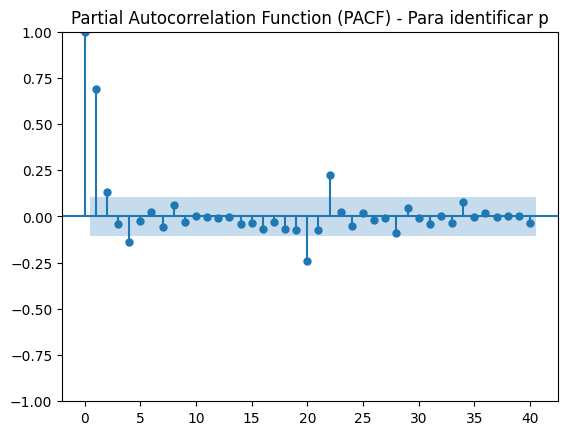

In [68]:

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
# Plot ACF (para identificar q)
plt.figure(figsize=(12,5))
plot_acf(df_boxcox_minus_mean.dropna(), lags=40)
plt.title('Autocorrelation Function (ACF) - Para identificar q')
plt.show()

# Plot PACF (para identificar p)
plt.figure(figsize=(12,5))
plot_pacf(df_boxcox_minus_mean.dropna(), lags=40, method='ywm')  # 'ywm' é mais robusto
plt.title('Partial Autocorrelation Function (PACF) - Para identificar p')
plt.show()

p = 5 q = 4

C:\Users\Administrador\AppData\Local\Temp\ipykernel_15492\218334998.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_export['Date'] = pd.to_datetime(df_export[['CO_ANO', 'CO_MES']].astype(str).agg('-'.join, axis=1) + '-01')
C:\Users\Administrador\AppData\Local\Temp\ipykernel_15492\218334998.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_export.dropna(inplace=True)
c:\Users\Administrador\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred fre

                                SARIMAX Results                                
Dep. Variable:     QT_ESTAT_winsor_log   No. Observations:                  337
Model:                  ARIMA(5, 1, 4)   Log Likelihood                -176.219
Date:                 Thu, 20 Feb 2025   AIC                            372.438
Time:                         11:02:47   BIC                            410.609
Sample:                     01-01-1997   HQIC                           387.654
                          - 01-01-2025                                         
Covariance Type:                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9973      0.096    -10.436      0.000      -1.185      -0.810
ar.L2         -0.4286      0.087     -4.900      0.000      -0.600      -0.257
ar.L3         -0.8538      0.071    -11.993 

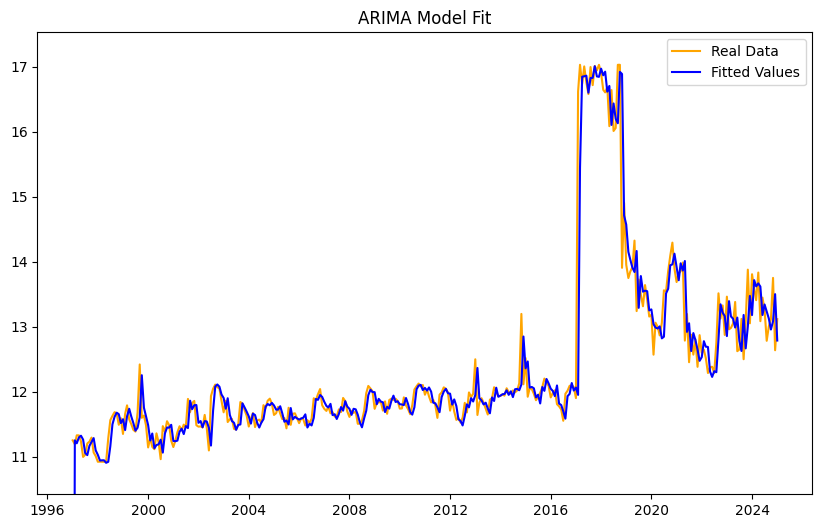

In [69]:
# Vamos corrigir isso:
df_export['Date'] = pd.to_datetime(df_export[['CO_ANO', 'CO_MES']].astype(str).agg('-'.join, axis=1) + '-01')

# Definir 'Date' como o índice temporal
df_export.set_index('Date', inplace=True)

# Remover valores NaN gerados pela diferenciação
df_export.dropna(inplace=True)

# Decomposição sazonal (opcional)
decomposition = seasonal_decompose(df_export['QT_ESTAT_winsor_log'], period=12)  # period=12 para dados mensais

# Ajustando o modelo ARIMA (p, d, q)
model = ARIMA(df_export['QT_ESTAT_winsor_log'], order=(5, 1, 4))  # Exemplos de parâmetros: (p=2, d=1, q=2)
results = model.fit()



# Exibir o resumo do modelo
print(results.summary())

# Plotando o gráfico: Dados reais e valores ajustados pelo modelo
plt.figure(figsize=(10, 6))
plt.plot(df_export['QT_ESTAT_winsor_log'], label='Real Data', color='orange')
plt.plot(results.fittedvalues, label='Fitted Values', color='blue')
# Ajustando limites de acordo com os dados
plt.ylim(df_export['QT_ESTAT_winsor_log'].min() - 0.5, df_export['QT_ESTAT_winsor_log'].max() + 0.5)
plt.title('ARIMA Model Fit')
plt.legend()
plt.show()

c:\Users\Administrador\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Administrador\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Administrador\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


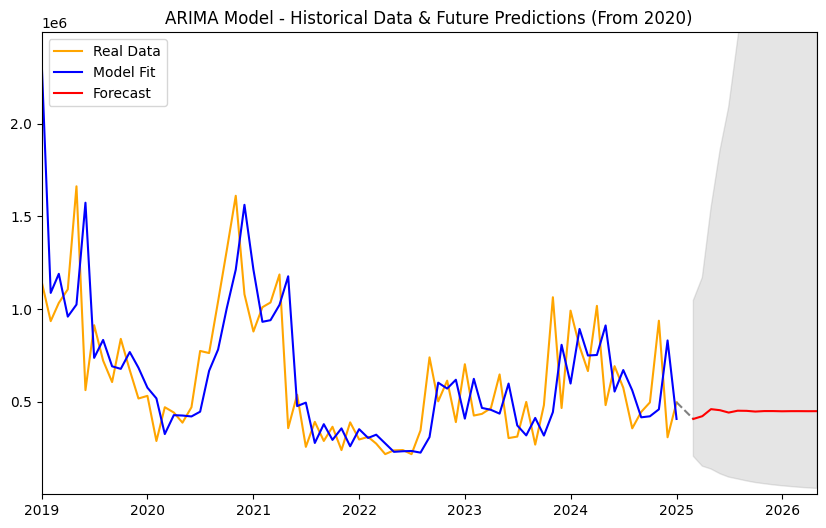

In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Ajuste do modelo ARIMA
model = ARIMA(df_export['QT_ESTAT_winsor_log'], order=(2, 1, 2))
results = model.fit()

# Número de previsões futuras
n_forecast = 15

# Gerando as previsões futuras
forecast = results.get_forecast(steps=n_forecast)
forecast_index = pd.date_range(df_export.index[-1], periods=n_forecast + 1, freq='ME')[1:]

# Pegando o último valor ajustado (fitted)
last_fitted_value = results.fittedvalues.iloc[-1]

# Valores previstos e intervalo de confiança (voltando à escala original)
forecast_values = np.exp(forecast.predicted_mean)
conf_int = forecast.conf_int()
conf_int_values = np.exp(conf_int)

# 🔹 **Corrigindo a descontinuidade**
forecast_values.iloc[0] = np.exp(last_fitted_value)  # Suaviza a transição

# 🔹 **Corrigindo o Model Fit para não começar em 0**
start_index = results.fittedvalues.first_valid_index()  # Obtém a primeira data válida
start_loc = df_export.index.get_loc(start_index)  # Converte para índice numérico
model_fit_values = np.exp(results.fittedvalues.iloc[start_loc:])  # Remove valores iniciais inconsistentes

# 🔹 **Plotando os dados limitando a partir d e ajustando escala Y**
plt.figure(figsize=(10, 6))

# Dados reais
plt.plot(df_export.index, np.exp(df_export['QT_ESTAT_winsor_log']), label='Real Data', color='orange')

# Ajuste do modelo (corrigido)
plt.plot(df_export.index[start_loc:], model_fit_values, label='Model Fit', color='blue')

# Conectando último valor real com a previsão
plt.plot([df_export.index[-1], forecast_index[0]], [np.exp(df_export['QT_ESTAT_winsor_log'].iloc[-1]), forecast_values.iloc[0]], color='gray', linestyle='--')

# Previsões futuras ajustadas
plt.plot(forecast_index, forecast_values, label='Forecast', color='red')

# Intervalo de confiança
plt.fill_between(forecast_index, conf_int_values.iloc[:, 0], conf_int_values.iloc[:, 1], color='gray', alpha=0.2)


ano = 2019
# Ajustando o eixo x para começar em ano
plt.xlim(pd.to_datetime('2019-01-01'), forecast_index[-1])

# Ajustando o eixo y para uma escala mais adequada (5% acima e abaixo dos dados)
y_min = np.exp(df_export['QT_ESTAT_winsor_log']).loc['2019':].min() * 0.001
y_max = np.exp(df_export['QT_ESTAT_winsor_log']).loc['2019':].max() * 1.5
plt.ylim(y_min, y_max)

# Ajustando legenda e título
plt.title('ARIMA Model - Historical Data & Future Predictions (From 2020)')
plt.legend()
plt.show()




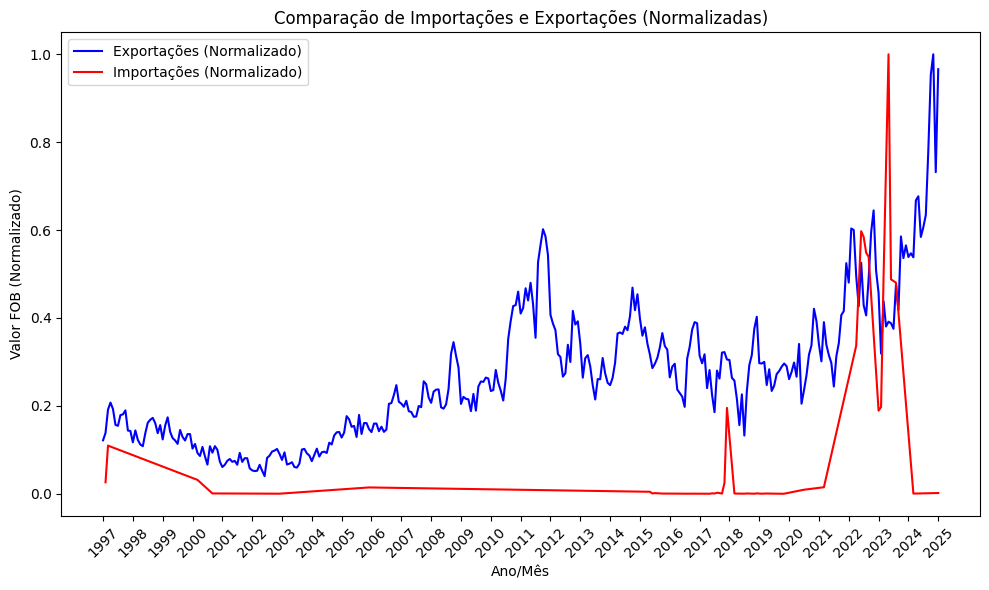

In [ ]:

# Normalizar os dados
export_max = merged_df[merged_df['Label'] == 'Export']['VL_FOB'].max()
import_max = merged_df[merged_df['Label'] == 'Import']['VL_FOB'].max()

df_export_normalized = merged_df[merged_df['Label'] == 'Export'].copy()
df_export_normalized['VL_FOB_normalized'] = df_export_normalized['VL_FOB'] / export_max

df_import_normalized = merged_df[merged_df['Label'] == 'Import'].copy()
df_import_normalized['VL_FOB_normalized'] = df_import_normalized['VL_FOB'] / import_max

# Plotando os dados normalizados
plt.figure(figsize=(10, 6))

# Plotando exportações normalizadas
plt.plot(df_export_normalized['CO_MES'].astype(str) + '/' + df_export_normalized['CO_ANO'].astype(str), 
         df_export_normalized['VL_FOB_normalized'], label='Exportações (Normalizado)', color='blue')

# Plotando importações normalizadas
plt.plot(df_import_normalized['CO_MES'].astype(str) + '/' + df_import_normalized['CO_ANO'].astype(str), 
         df_import_normalized['VL_FOB_normalized'], label='Importações (Normalizado)', color='red')

# Título e rótulos
plt.title('Comparação de Importações e Exportações (Normalizadas)')
plt.xlabel('Ano/Mês')
plt.ylabel('Valor FOB (Normalizado)')

# Exibindo a legenda
plt.legend()

# Definir os ticks no eixo x para mostrar apenas os anos
years = df_export['CO_ANO'].unique()
year_labels = [str(year) for year in years]

# Alterar os ticks no eixo x para exibir apenas os anos
plt.xticks(ticks=range(0, len(df_export), 12), labels=year_labels, rotation=45)
plt.tight_layout()
plt.show()
